<IPython.core.display.Javascript object>


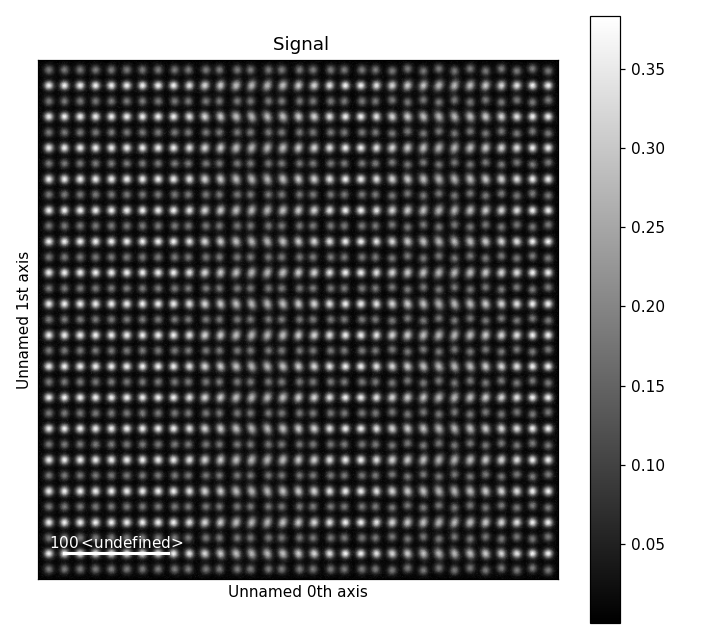

  0%|          | 0/25 [00:00<?, ?it/s]

[########################################] | 100% Completed |  0.1s


  0%|          | 0/1089 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


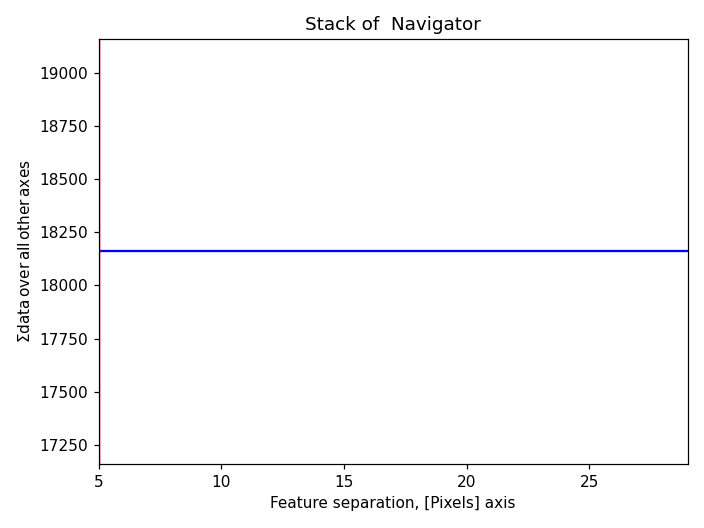

<IPython.core.display.Javascript object>


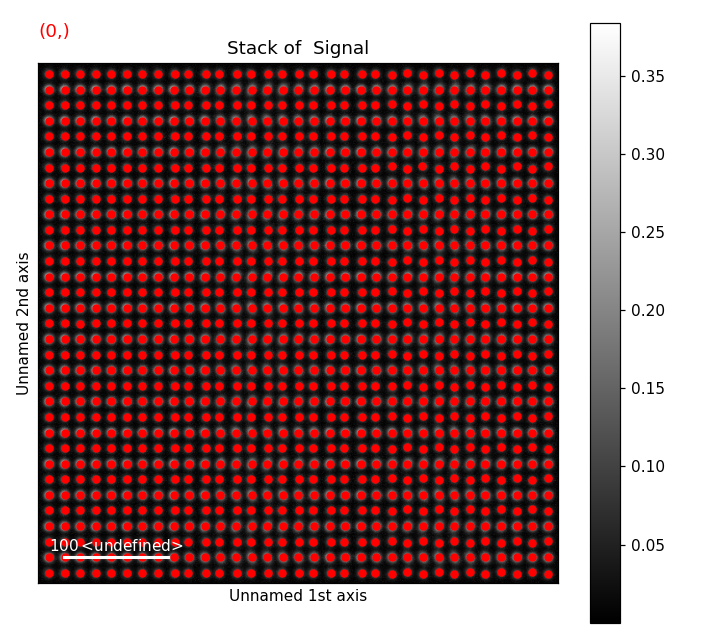

In [3]:
%matplotlib notebook
import hyperspy.api as hs
import atomap.api as am
s = am.dummy_data.get_fantasite()
s.plot()
s_peaks = am.get_feature_separation(s, pca=True)
s_peaks.plot()

In [4]:
atom_positions = am.get_atom_positions(s, separation=12, pca=True)

In [5]:
 sublattice = am.Sublattice(atom_position_list=atom_positions, image=s.data)

<IPython.core.display.Javascript object>


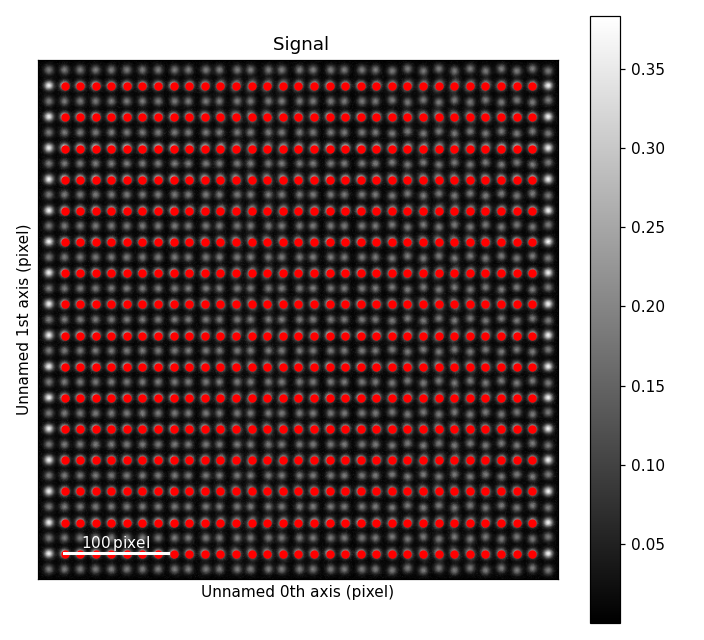

In [6]:
 sublattice.plot()

Center of mass:   0%|          | 0/496 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/496 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


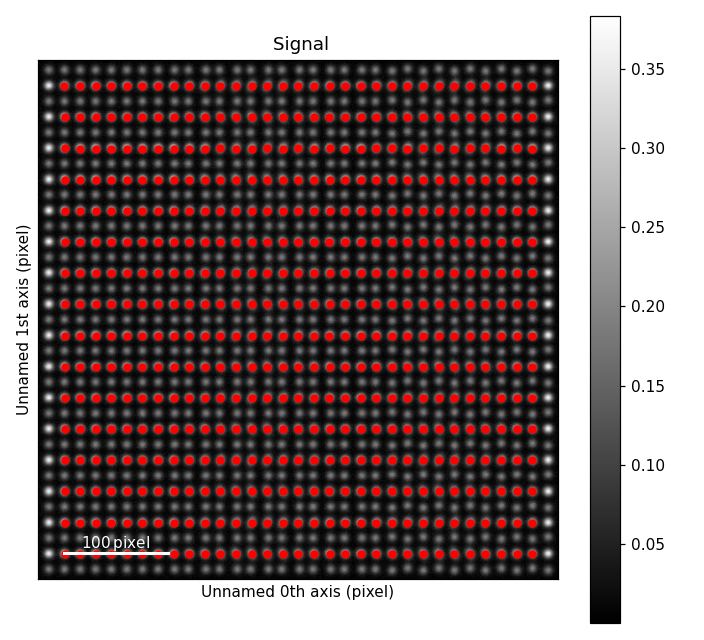

In [7]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()
sublattice.plot()

<IPython.core.display.Javascript object>


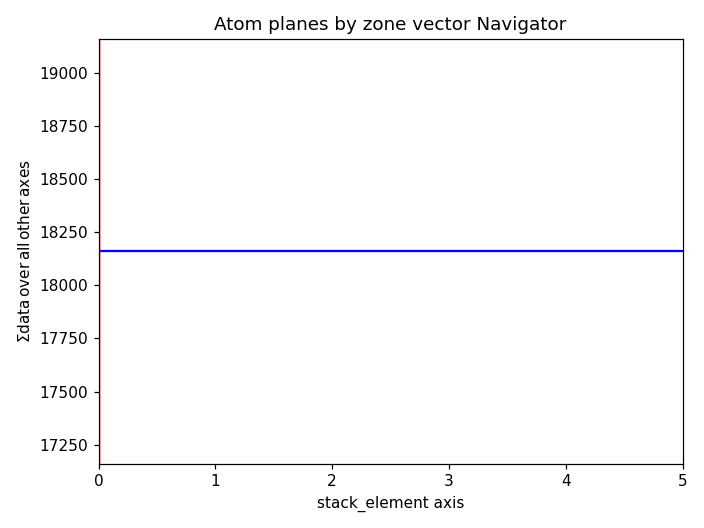

<IPython.core.display.Javascript object>


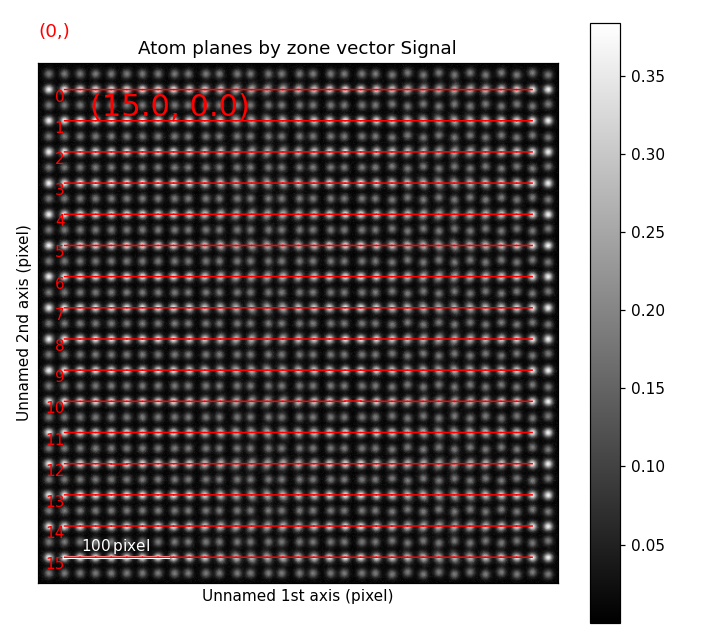

In [9]:
sublattice.construct_zone_axes()
sublattice.plot_planes()
    

In [10]:
zone_axis_001 = sublattice.zones_axis_average_distances[1]
zone_axis_001

(-0.0, 30.0)

In [11]:
 positions2 = sublattice.find_missing_atoms_from_zone_vector(zone_axis_001)

In [12]:
 from atomap.tools import remove_atoms_from_image_using_2d_gaussian
image_atoms_subtracted = remove_atoms_from_image_using_2d_gaussian(sublattice.image, sublattice)

Subtracting atoms:   0%|          | 0/496 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


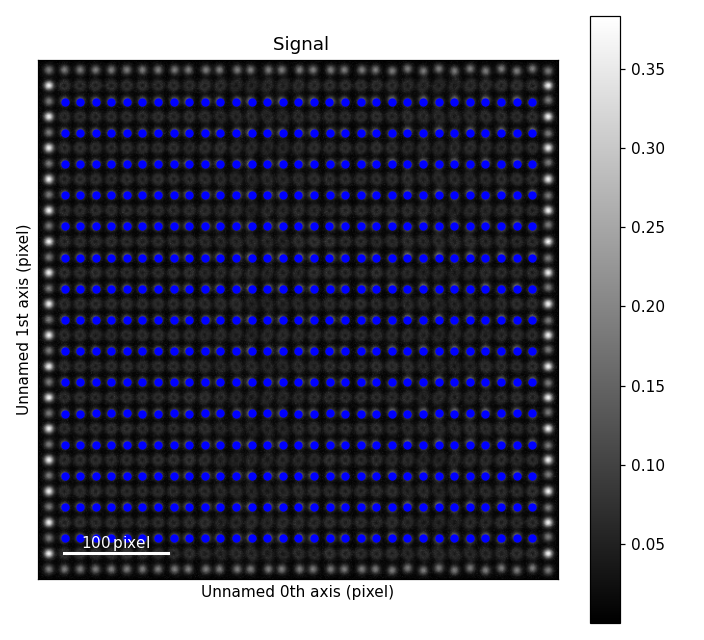

In [13]:
sublattice2 = am.Sublattice(positions2, image_atoms_subtracted, color='blue')
sublattice2.plot()

In [14]:
sublattice2.construct_zone_axes()
sublattice2.refine_atom_positions_using_center_of_mass()
sublattice2.refine_atom_positions_using_2d_gaussian()

Center of mass:   0%|          | 0/465 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/465 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


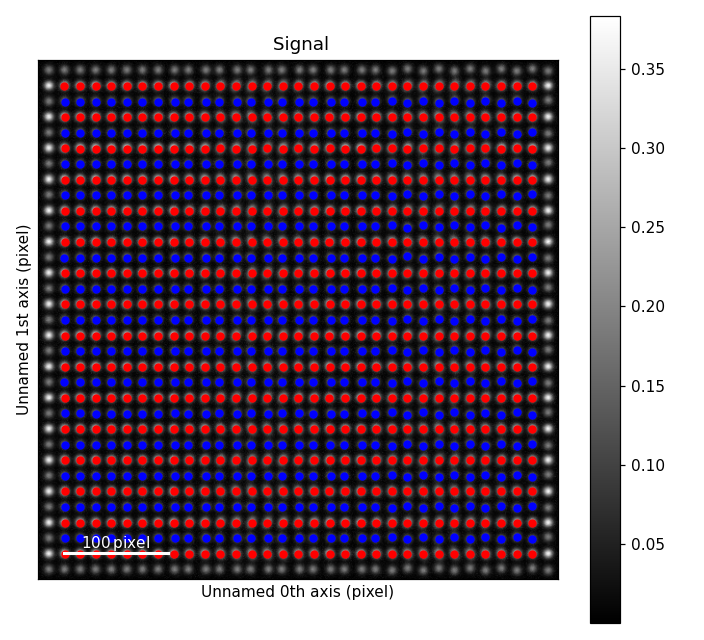

In [15]:
atom_lattice = am.Atom_Lattice(image=s.data, name='fantasite', sublattice_list=[sublattice, sublattice2])
atom_lattice.plot()

In [16]:
 atom_lattice.save(overwrite=True)

In [17]:
 atom_lattice2 = am.load_atom_lattice_from_hdf5("fantasite_atom_lattice.hdf5")

<IPython.core.display.Javascript object>


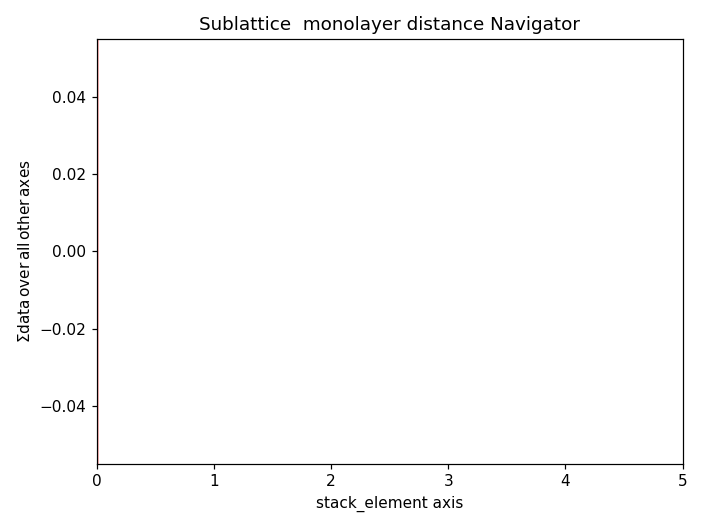

<IPython.core.display.Javascript object>


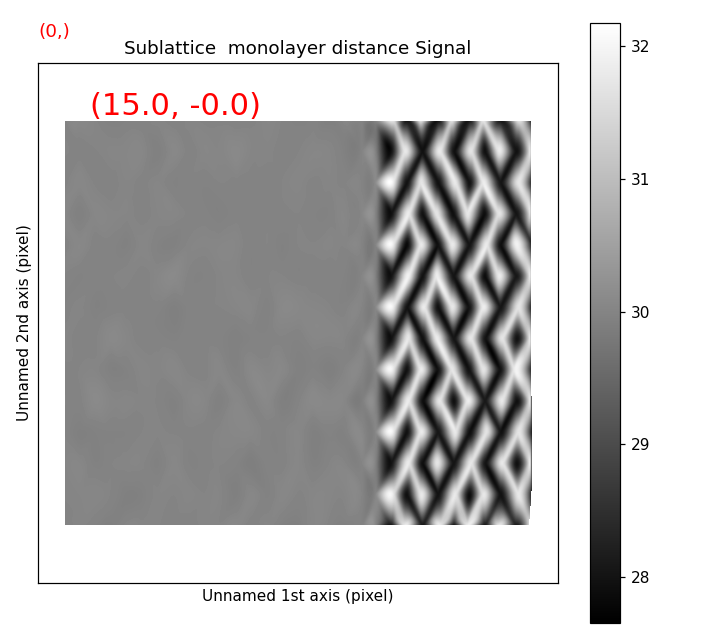

In [18]:
s_monolayer = sublattice2.get_monolayer_distance_map()
s_monolayer.plot()

<IPython.core.display.Javascript object>


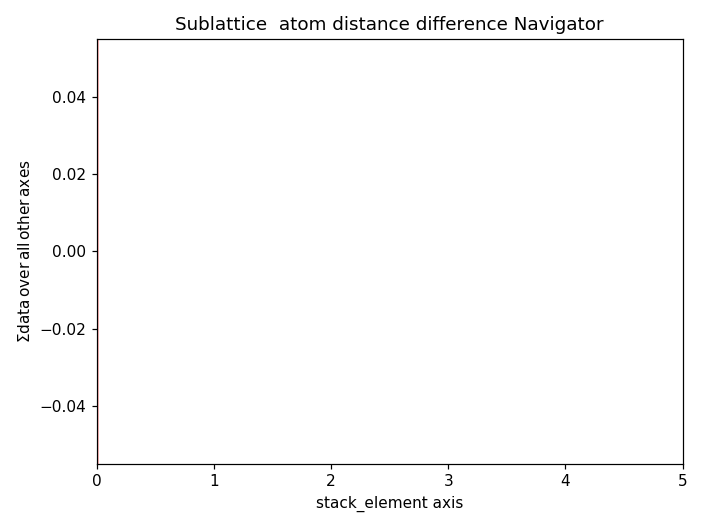

<IPython.core.display.Javascript object>


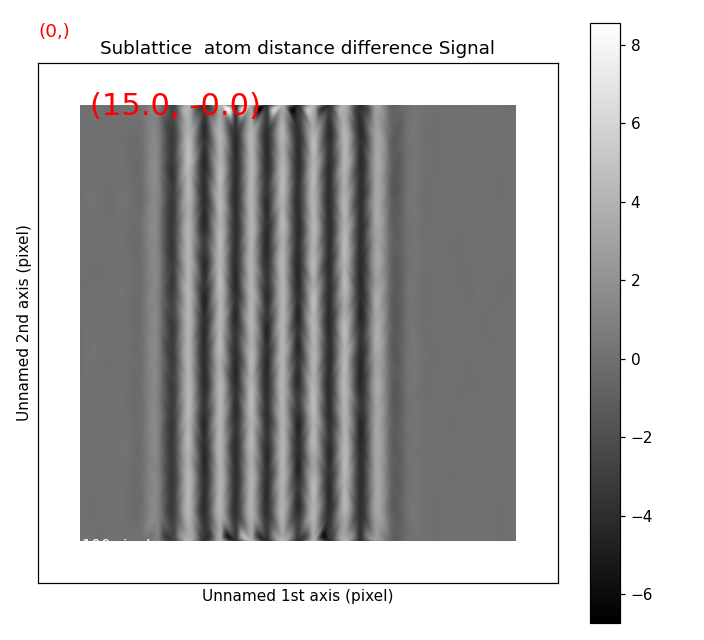

In [19]:
s_distance_difference = sublattice2.get_atom_distance_difference_map()
s_distance_difference.plot()

<IPython.core.display.Javascript object>


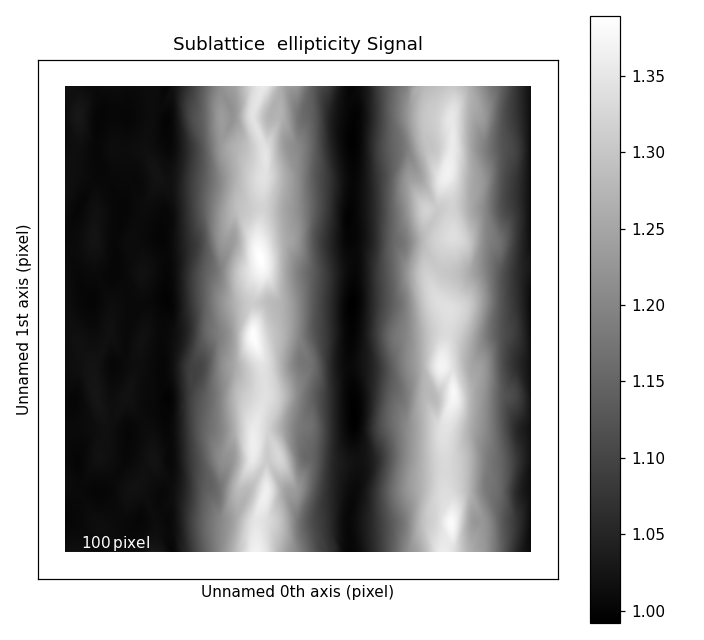

In [21]:
s_elli = sublattice.get_ellipticity_map()
s_elli.plot()

<IPython.core.display.Javascript object>


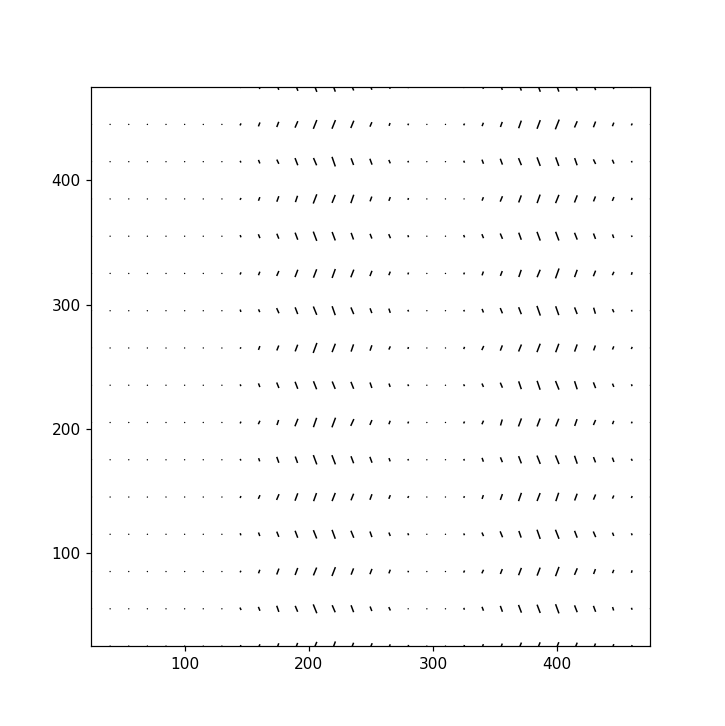

In [22]:
 sublattice.plot_ellipticity_vectors()

Calculating Voronoi:   0%|          | 0/250000 [00:00<?, ?it/s]

Integrating:   0%|          | 0/961 [00:00<?, ?it/s]

Building intensity map:   0%|          | 0/250000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


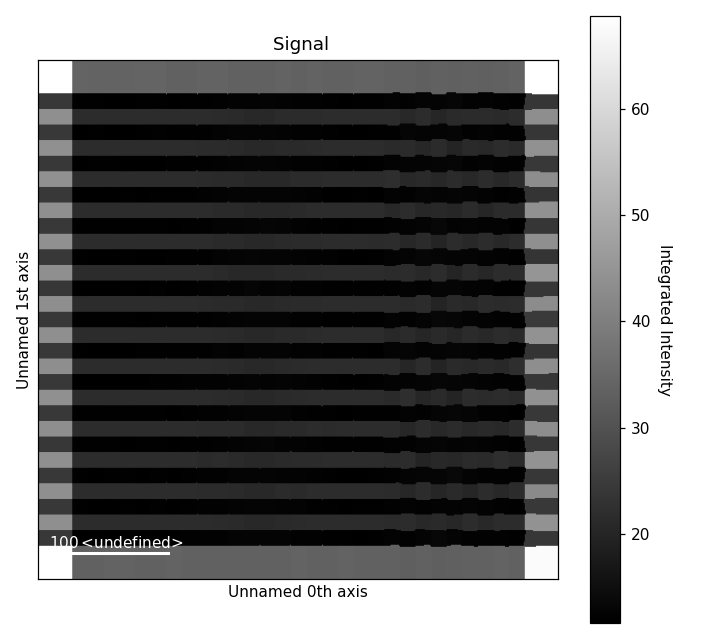

In [23]:
i_points, i_record, p_record = atom_lattice.integrate_column_intensity()
i_record.plot()

Calculating Voronoi:   0%|          | 0/250000 [00:00<?, ?it/s]

Integrating:   0%|          | 0/496 [00:00<?, ?it/s]

Building intensity map:   0%|          | 0/250000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


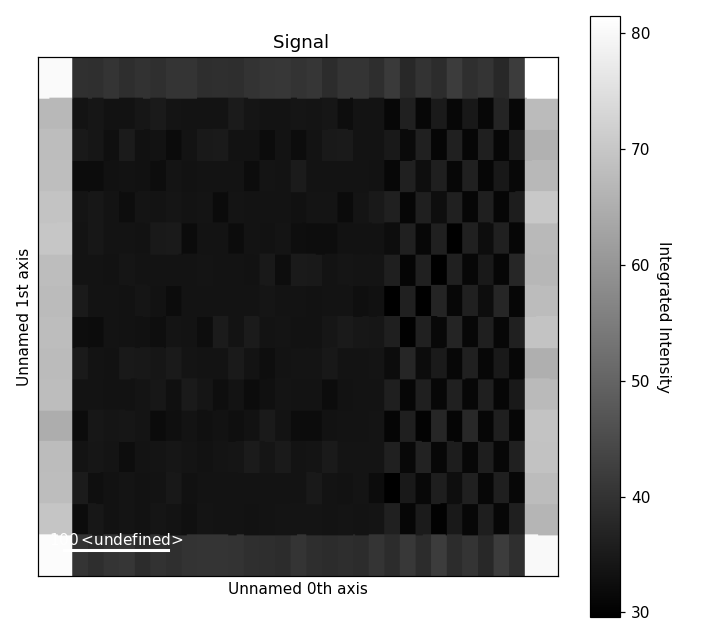

In [24]:
i_points, i_record, p_record = sublattice.integrate_column_intensity()
i_record.plot()

<IPython.core.display.Javascript object>


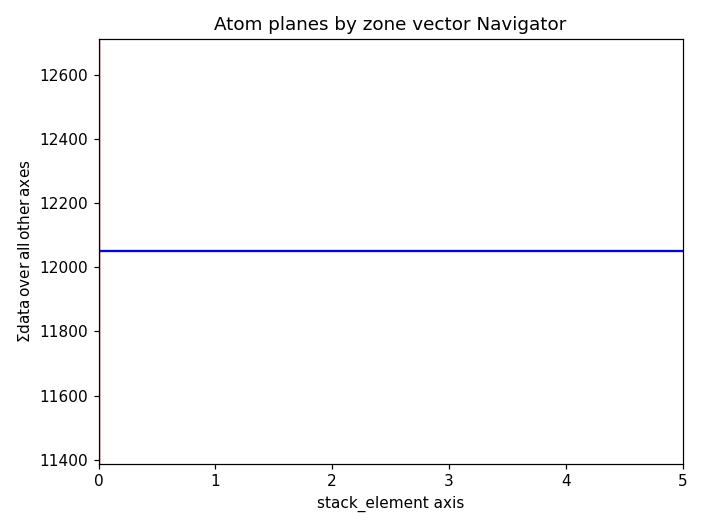

<IPython.core.display.Javascript object>


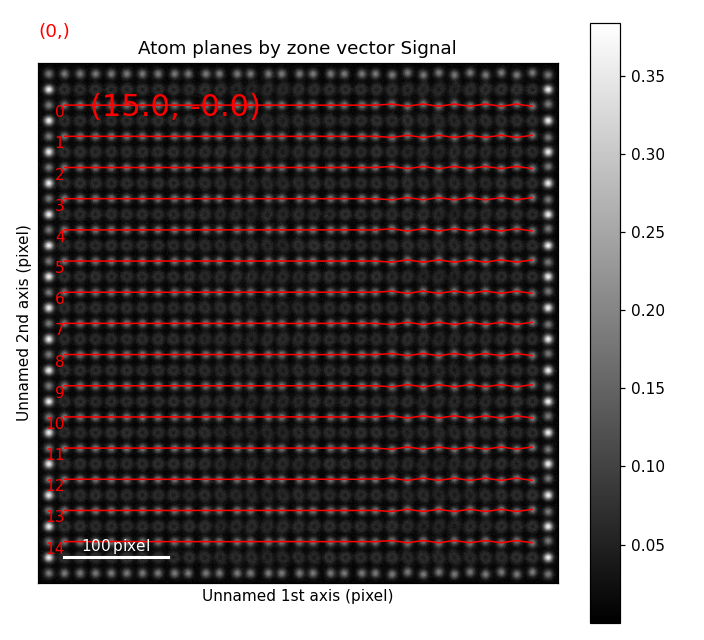

In [25]:
 sublattice2.plot_planes()

In [26]:
 zone = sublattice2.zones_axis_average_distances[1]

In [27]:
 plane = sublattice2.atom_planes_by_zone_vector[zone][10]

<IPython.core.display.Javascript object>


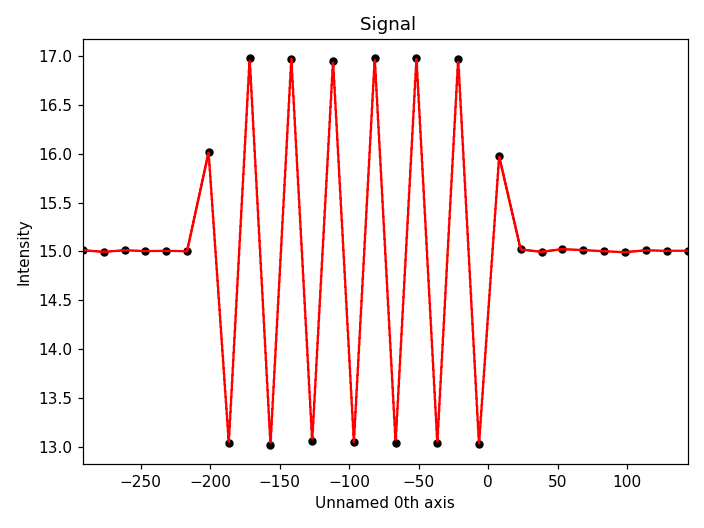

In [28]:
s_monolayer_line = sublattice2.get_monolayer_distance_line_profile(zone_vector=zone, atom_plane=plane)
s_monolayer_line.plot()